In [946]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [947]:
data, meta = arff.loadarff('./EEG Eye State.arff')

In [948]:
data

array([(4329.23, 4009.23, 4289.23, 4148.21, 4350.26, 4586.15, 4096.92, 4641.03, 4222.05, 4238.46, 4211.28, 4280.51, 4635.9 , 4393.85, b'0'),
       (4324.62, 4004.62, 4293.85, 4148.72, 4342.05, 4586.67, 4097.44, 4638.97, 4210.77, 4226.67, 4207.69, 4279.49, 4632.82, 4384.1 , b'0'),
       (4327.69, 4006.67, 4295.38, 4156.41, 4336.92, 4583.59, 4096.92, 4630.26, 4207.69, 4222.05, 4206.67, 4282.05, 4628.72, 4389.23, b'0'),
       ...,
       (4277.44, 3990.77, 4246.67, 4113.85, 4333.33, 4615.38, 4072.82, 4623.59, 4193.33, 4212.82, 4160.51, 4257.95, 4591.79, 4339.49, b'1'),
       (4284.62, 3991.79, 4251.28, 4122.05, 4334.36, 4616.41, 4080.51, 4628.72, 4200.  , 4220.  , 4165.64, 4267.18, 4596.41, 4350.77, b'1'),
       (4287.69, 3997.44, 4260.  , 4121.03, 4333.33, 4616.41, 4088.72, 4638.46, 4212.31, 4226.67, 4167.69, 4274.36, 4597.95, 4350.77, b'1')],
      dtype=[('AF3', '<f8'), ('F7', '<f8'), ('F3', '<f8'), ('FC5', '<f8'), ('T7', '<f8'), ('P7', '<f8'), ('O1', '<f8'), ('O2', '<f8'), ('P8',

In [949]:
meta

Dataset: EEG_DATA
	AF3's type is numeric
	F7's type is numeric
	F3's type is numeric
	FC5's type is numeric
	T7's type is numeric
	P7's type is numeric
	O1's type is numeric
	O2's type is numeric
	P8's type is numeric
	T8's type is numeric
	FC6's type is numeric
	F4's type is numeric
	F8's type is numeric
	AF4's type is numeric
	eyeDetection's type is nominal, range is ('0', '1')

In [950]:
df = pd.DataFrame(data)

In [951]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [952]:
df['eyeDetection'] = df['eyeDetection'].apply(lambda x: int(x.decode()))

In [953]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [954]:
len(df)

14980

In [955]:
import numpy as np
import pandas as pd
from scipy.signal import firwin, filtfilt
import math as math


In [956]:
sampling_rate = math.floor(len(df)/117)
print(sampling_rate)

128


In [957]:
def design_fir_bandpass(low, high, fs, width=1.0, ripple_db=60.0):
    return firwin(
        numtaps=int(fs*2),  # 2 sec filter kernel
        cutoff=[low, high],
        window=('kaiser', ripple_db),
        pass_zero=False,
        fs=fs,
        width=width
    )


In [958]:
fs = sampling_rate
f_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30)
}
filters = {band: design_fir_bandpass(lo, hi, fs) for band, (lo, hi) in f_bands.items()}


In [959]:
def bandpower(signal, fs, taps, window_size=1.0):
    """
    Returns band power over time using sliding windows.
    signal: 1D array
    fs: sampling rate
    taps: filter coefficients
    window_size: in seconds
    """
    filtered = filtfilt(taps, 1.0, signal)
    win_len = int(window_size * fs)
    powers = []

    for start in range(0, len(signal) - win_len + 1, win_len):
        segment = filtered[start:start + win_len]
        power = np.mean(segment ** 2)  # Mean power over window
        powers.append(power)

    return powers


In [960]:
eeg_channels = df.columns[:-1]  # exclude 'eyeDetection'
eeg_data = df[eeg_channels].values

# Result shape: (num_windows, num_channels * num_bands)
window_size = 1  # seconds
features = []

for ch_idx in range(eeg_data.shape[1]):
    ch_data = eeg_data[:, ch_idx]
    band_powers = []
    for band, taps in filters.items():
        power_series = bandpower(ch_data, fs, taps, window_size)
        band_powers.append(power_series)
    
    # Each band_powers list is (num_bands, num_windows), so we transpose
    features.append(np.array(band_powers).T)

# Concatenate all channel-band features
X = np.hstack(features)  # Shape: (num_windows, num_channels * num_bands)


In [961]:
from scipy.stats import mode

eye = df['eyeDetection'].values
win_len = int(window_size * fs)
y = []

for i in range(0, len(eye) - win_len + 1, win_len):
    window = eye[i:i+win_len]
    mode_result = mode(window)  # returns ModeResult object
    y.append(mode_result.mode)  # access mode attribute (array), take first element

y = np.array(y)


In [962]:
from scipy.stats import mode
time_steps = 10
X_seq, y_seq = [], []

for i in range(len(X) - time_steps):
    X_seq.append(X[i:i+time_steps])
    y_seq.append(mode(y[i:i+time_steps]).mode)

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)


In [963]:
from sklearn.model_selection import train_test_split

# Initial split: train (80%) + test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# Secondary split: train (80%) + val (20%) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=False)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (72, 10, 56)
y_train shape: (72,)


In [964]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def build_model(hp):
    model = Sequential()
    
    # Tune the number of LSTM units
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        input_shape=(X_train.shape[1], X_train.shape[2]),
    ))

    # Tune dropout rate
    model.add(Dropout(hp.Float('dropout', 0.0, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tune learning rate
    model.compile(
        optimizer=Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Setup tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='eye_state'
)

# Search for best parameters
tuner.search(X_train, y_train, 
            epochs=20, 
            validation_data=(X_val, y_val),
            verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from lstm_tuning/eye_state/tuner0.json


/home/purab/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/purab/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [965]:
# If you want to also see training metrics from the best trial:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial_metrics = best_trial.metrics.get_best_value('val_accuracy')

print(f"Best validation accuracy during tuning: {best_trial_metrics:.4f}")


# Evaluate the best model on test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best hyperparameters:
- LSTM units: {best_hps.get('units')}
- Dropout rate: {best_hps.get('dropout')}
- Learning rate: {best_hps.get('lr')}

Best model performance:
- Test accuracy: {test_accuracy:.4f}
- Test loss: {test_loss:.4f}
""")



Best validation accuracy during tuning: 0.8462

Best hyperparameters:
- LSTM units: 96
- Dropout rate: 0.0
- Learning rate: 0.00020428050669693538

Best model performance:
- Test accuracy: 0.5909
- Test loss: 0.7081



In [966]:
import numpy as np

# Predict probabilities
y_probs = best_model.predict(X_test).ravel()

# Convert to binary predictions using threshold 0.5
y_pred = (y_probs >= 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


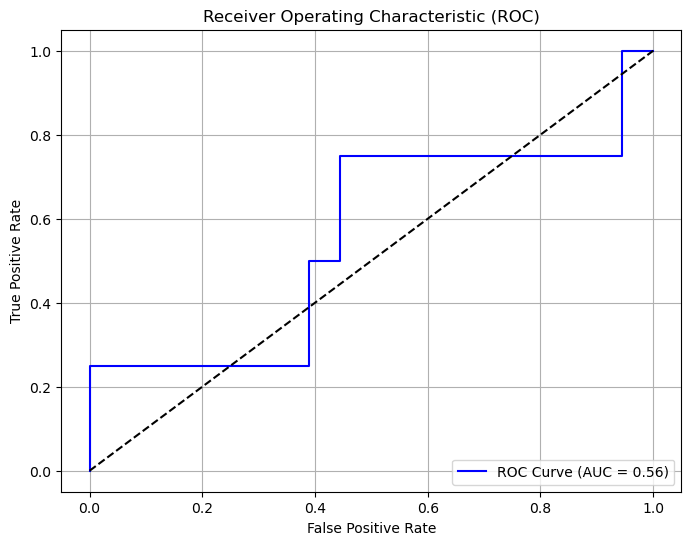

In [967]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


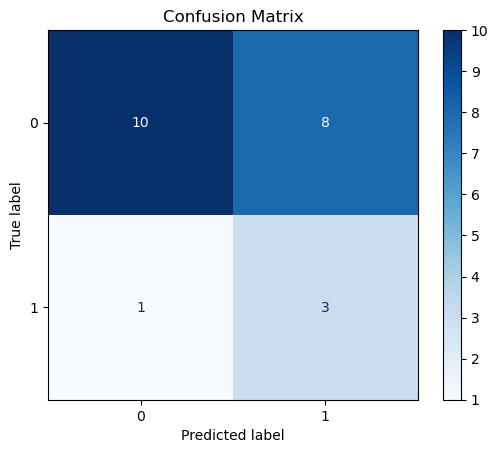

In [968]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [969]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:

              precision    recall  f1-score   support

           0     0.9091    0.5556    0.6897        18
           1     0.2727    0.7500    0.4000         4

    accuracy                         0.5909        22
   macro avg     0.5909    0.6528    0.5448        22
weighted avg     0.7934    0.5909    0.6370        22

